# Video example

Simple example of subsampled dynamic-foreground/static-background video seperation.


In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import cv2

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *

In [2]:
frames = []

path = "data/dataset_shop.avi"
cap = cv2.VideoCapture(path)
ret = True
while ret:
    ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
    if ret:
        frames.append(img)
video = np.stack(frames, axis=0) # dimensions (T, H, W, C)

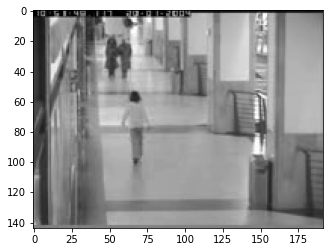

In [3]:
plt.imshow(cv2.cvtColor(video[50,:,:,:], cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
T = video.shape[0]
H = video.shape[1]
W = video.shape[2]
C = video.shape[3]


rho_r = 0.01
rho_s = 0.1
delta = 0.5

m = H*W
n = T
p = round(delta*m*n)
s = round(rho_s*p)
alpha = s/(m*n)
r = round(.5*( m+n - np.sqrt( (m+n)**2 - 4*rho_r*p ) ))
print(str(r) +','+ str(s))

HTr = FixedRank(r)
HTs = Sparsity(s)

# Prepare transform
A = TensorLinearOperator((T, H * W), FastJLT((p, H * W * T)))

video_mat = video.reshape((T, -1, C))
bs = []
for band in range(C):
    bs.append(A.matvec(video_mat[:,:,band]))

1,217037


In [9]:
bs = []
for band in range(C):
    bs.append(A.matvec(video_mat[:,:,band]))

In [10]:
solver = NAHT(logverbosity = 2, maxiter = 30)
problem = LinearProblemSum(A, bs[0], (HTr, HTs))

In [11]:
x, opt_log = solver.solve(problem)

 iter		   obj. value	    grad. norm
    1	+4.6096262257830673e+08	5.39988511e+03
    2	+3.2373590689281046e+08	4.18902384e+03
    3	+2.5429414811962038e+08	3.62236624e+03
    4	+2.0790762806365442e+08	3.20186050e+03
    5	+1.7602820866760316e+08	2.95306818e+03
    6	+1.5221877044384614e+08	2.72858180e+03
    7	+1.3462120932557940e+08	2.57069276e+03
    8	+1.2106872243672445e+08	2.43243938e+03
    9	+1.1061963293295537e+08	2.32313031e+03
   10	+1.0247136000343581e+08	2.23065000e+03
   11	+9.6046679860584840e+07	2.15356009e+03
   12	+9.0970763924057126e+07	2.09007753e+03
   13	+8.6901477007103503e+07	2.04431626e+03
   14	+8.3648197505158514e+07	2.02294151e+03
   15	+8.1045320824061602e+07	2.01165683e+03


In [8]:
opt_log['iterations'].keys()

dict_keys(['iteration', 'time', 'fx', 'xdist'])

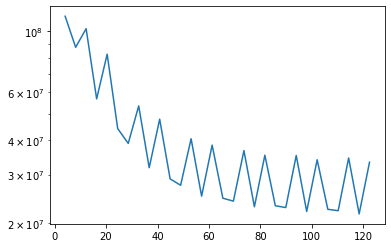

In [17]:
plt.semilogy(opt_log['iterations']['time'], opt_log['iterations']['fx'])

In [12]:
L = x[0].reshape(T, H, W, 1)
S = x[1].reshape(T, H, W, 1)

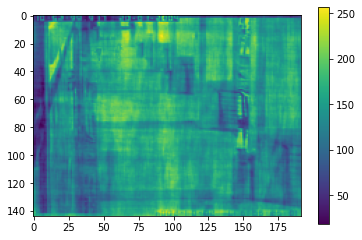

In [13]:
plt.imshow(L[50,:,:,:])
plt.colorbar()

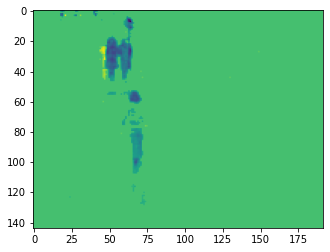

In [14]:
plt.imshow(S[50,:,:,:])